In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
path = './data/'
ll_data = 'leaf_level/'
csv = '.csv'

In [3]:
mkt_data = pd.read_csv(path+'power_market_MA'+csv, parse_dates = ["date"])
mkt_data.sort_values("date", inplace=True)
mkt_data.drop('Unnamed: 0', axis=1, inplace=True)
supp_data = pd.read_csv(path+ll_data+'Criador_51103_500_Meltan'+csv, parse_dates = ["date"])
supp_data.sort_values("date", inplace=True)

In [4]:
supp_data = supp_data.groupby('date').agg({'price_year_eur':'mean'})

In [5]:
supp_data.head()

,price_year_eur
date,
2021-05-25,260.25
2021-05-26,260.25
2021-05-27,260.25
2021-05-28,260.25
2021-05-29,260.25


In [6]:
supp_data.tail()

,price_year_eur
date,
2021-11-11,282.15
2021-11-12,282.15
2021-11-13,282.15
2021-11-14,282.15
2021-11-15,282.15


In [7]:
mkt_data.head()

,date,spot,base_d00,base_d01,base_d02,base_d03,base_d04,base_d05,base_d06,base_d07,...,peak_y06_SMA15,peak_y06_EWM15,peak_y06_SMA30,peak_y06_EWM30,peak_y06_SMA60,peak_y06_EWM60,peak_y06_SMA100,peak_y06_EWM100,peak_y06_SMA200,peak_y06_EWM200
0,2021-05-25,59.780417,59.78,65.61,68.10,73.73,57.80,51.66,69.22,70.92,...,69.034667,68.447389,67.212000,67.495835,65.541500,66.005817,64.0547,64.722294,62.12790,63.043412
1,2021-05-26,65.605833,65.61,71.77,78.24,64.67,49.43,75.34,75.46,70.92,...,69.121333,68.510215,67.372000,67.589652,65.645167,66.102347,64.1417,64.806011,62.17000,63.102184
2,2021-05-27,71.767500,71.77,73.60,62.36,46.94,73.16,75.76,74.76,70.92,...,69.176000,68.608938,67.541000,67.699997,65.754667,66.207188,64.2314,64.895001,62.21385,63.163854
3,2021-05-28,73.602083,73.60,56.49,43.15,67.88,72.33,71.49,60.90,70.92,...,69.252667,68.655321,67.699333,67.782578,65.858833,66.298100,64.3217,64.975892,62.25610,63.221726
4,2021-05-29,56.487917,56.49,37.85,67.46,68.25,64.08,59.83,69.75,57.18,...,69.128667,68.677156,67.843667,67.850154,65.953833,66.381113,64.4100,65.052211,62.29825,63.277529


In [8]:
mkt_data.tail()

,date,spot,base_d00,base_d01,base_d02,base_d03,base_d04,base_d05,base_d06,base_d07,...,peak_y06_SMA15,peak_y06_EWM15,peak_y06_SMA30,peak_y06_EWM30,peak_y06_SMA60,peak_y06_EWM60,peak_y06_SMA100,peak_y06_EWM100,peak_y06_SMA200,peak_y06_EWM200
502,2022-10-09,146.724583,146.72,162.09,259.87,301.67,250.00,198.72,134.28,96.72,...,145.827333,147.528985,145.944667,146.537960,150.134167,145.526188,144.5485,142.793117,134.93085,133.711244
503,2022-10-10,162.090000,162.09,259.87,301.67,250.00,198.72,134.28,96.72,96.72,...,146.510000,148.415362,146.551667,147.059382,150.179167,145.824346,144.6444,143.027313,135.20100,133.919291
504,2022-10-11,259.873750,259.87,282.54,255.62,225.96,141.96,74.96,185.42,96.72,...,147.088667,148.995941,147.106667,147.446519,150.216167,146.061581,144.7247,143.225980,135.46345,134.109746
505,2022-10-12,282.535833,282.54,257.46,236.92,176.00,89.56,221.58,224.39,96.72,...,147.535333,149.482699,147.656000,147.797711,150.301833,146.285463,144.8033,143.417347,135.72085,134.296614
506,2022-10-13,257.455833,257.46,260.65,173.98,98.02,214.71,246.97,227.71,96.72,...,147.710000,149.282361,147.767333,147.803020,150.304000,146.337743,144.8433,143.505716,135.95320,134.431772


In [9]:
supp_data = supp_data.merge(mkt_data, how='inner', on='date')

In [10]:
supp_data.corr()

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_12044\437151006.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  supp_data.corr()


,price_year_eur,spot,base_d00,base_d01,base_d02,base_d03,base_d04,base_d05,base_d06,base_d07,...,peak_y06_SMA15,peak_y06_EWM15,peak_y06_SMA30,peak_y06_EWM30,peak_y06_SMA60,peak_y06_EWM60,peak_y06_SMA100,peak_y06_EWM100,peak_y06_SMA200,peak_y06_EWM200
price_year_eur,1.000000,0.512733,0.512746,0.495166,0.525216,0.513333,0.506769,0.459172,0.433760,0.354054,...,0.717154,0.715250,0.813197,0.784232,0.878182,0.827417,0.826485,0.832328,0.812144,0.826808
spot,0.512733,1.000000,1.000000,0.745665,0.589161,0.468664,0.408376,0.453417,0.636777,0.691224,...,0.736012,0.738012,0.711414,0.729262,0.694158,0.718324,0.700355,0.713173,0.712076,0.710008
base_d00,0.512746,1.000000,1.000000,0.745659,0.589166,0.468670,0.408375,0.453416,0.636775,0.691221,...,0.736015,0.738014,0.711418,0.729266,0.694164,0.718328,0.700359,0.713177,0.712079,0.710012
base_d01,0.495166,0.745665,0.745659,1.000000,0.780389,0.585977,0.465741,0.461415,0.522088,0.616818,...,0.723701,0.727872,0.704916,0.718935,0.679165,0.706004,0.684284,0.699079,0.694682,0.694283
base_d02,0.525216,0.589161,0.589166,0.780389,1.000000,0.820832,0.611836,0.549946,0.583176,0.634779,...,0.777811,0.782366,0.764590,0.773060,0.722268,0.754784,0.720546,0.743285,0.731143,0.734257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peak_y06_EWM60,0.827417,0.718324,0.718328,0.706004,0.754784,0.753381,0.750619,0.736136,0.741260,0.710164,...,0.971866,0.973220,0.993663,0.993175,0.991285,1.000000,0.986338,0.998061,0.989442,0.993821
peak_y06_SMA100,0.826485,0.700355,0.700359,0.684284,0.720546,0.717700,0.716124,0.695461,0.697420,0.673458,...,0.930319,0.933702,0.962856,0.963543,0.990414,0.986338,1.000000,0.994616,0.998145,0.998329
peak_y06_EWM100,0.832328,0.713173,0.713177,0.699079,0.743285,0.741378,0.739133,0.721993,0.725795,0.696654,...,0.958630,0.960759,0.985196,0.984914,0.994655,0.998061,0.994616,1.000000,0.995803,0.998709
peak_y06_SMA200,0.812144,0.712076,0.712079,0.694682,0.731143,0.729040,0.727998,0.709309,0.713642,0.701075,...,0.944990,0.948475,0.968759,0.972176,0.987100,0.989442,0.998145,0.995803,1.000000,0.998924


In [11]:
supp_data.tail()

,date,price_year_eur,spot,base_d00,base_d01,base_d02,base_d03,base_d04,base_d05,base_d06,...,peak_y06_SMA15,peak_y06_EWM15,peak_y06_SMA30,peak_y06_EWM30,peak_y06_SMA60,peak_y06_EWM60,peak_y06_SMA100,peak_y06_EWM100,peak_y06_SMA200,peak_y06_EWM200
145,2021-11-11,282.15,190.426667,190.43,166.90,152.85,117.65,183.16,197.76,176.29,...,84.730000,85.017619,84.768333,84.804683,85.031000,83.587640,81.0173,81.281891,74.99105,76.460809
146,2021-11-12,282.15,166.896250,166.90,156.90,139.00,201.00,226.04,173.65,145.67,...,84.836667,85.096667,84.805000,84.859219,85.081000,83.655258,81.1635,81.368388,75.09855,76.552244
147,2021-11-13,282.15,156.897500,156.90,169.30,227.96,237.47,162.90,122.00,103.27,...,85.010000,85.253333,84.855000,84.955399,85.143000,83.743611,81.3170,81.467034,75.20915,76.649734
148,2021-11-14,282.15,169.295417,169.30,227.96,237.47,162.90,122.00,103.27,116.22,...,85.186667,85.390417,84.888333,85.045373,85.183833,83.829066,81.4710,81.563726,75.31975,76.746254
149,2021-11-15,282.15,227.957917,227.96,237.47,162.90,122.00,103.27,116.22,96.94,...,85.363333,85.510365,84.955000,85.129543,85.235500,83.911720,81.6247,81.658504,75.42900,76.841814


In [12]:
supp_data.iloc[:5, 300:330]

,base_q02_EWM30,base_q02_SMA60,base_q02_EWM60,base_q02_SMA100,base_q02_EWM100,base_q02_SMA200,base_q02_EWM200,base_q03_SMA7,base_q03_EWM7,base_q03_SMA15,...,base_q04_EWM7,base_q04_SMA15,base_q04_EWM15,base_q04_SMA30,base_q04_EWM30,base_q04_SMA60,base_q04_EWM60,base_q04_SMA100,base_q04_EWM100,base_q04_SMA200
0,70.114958,65.707000,66.061568,59.6094,61.666249,51.37415,54.840795,73.162857,74.187924,75.191333,...,57.613144,58.657333,57.584749,56.429667,56.798092,54.683167,56.046550,56.2123,55.365806,53.32360
1,70.406896,66.050167,66.342828,59.8622,61.923155,51.56560,55.037802,74.271429,74.813443,75.291333,...,57.997358,58.717333,57.780405,56.664333,56.949828,54.649333,56.148302,56.2322,55.440741,53.40160
2,70.535484,66.356000,66.541424,60.0962,62.130617,51.74585,55.210560,74.442857,74.675083,75.105333,...,57.905519,58.558000,57.761605,56.833667,56.993710,54.590167,56.196882,56.2396,55.484093,53.47200
3,70.612549,66.650667,66.711541,60.3287,62.320704,51.92275,55.374933,74.414286,74.431312,74.960667,...,57.654139,58.380000,57.653904,56.990000,56.987665,54.518833,56.219935,56.2436,55.512130,53.53875
4,70.671095,66.864167,66.869196,60.5588,62.502868,52.10100,55.535580,74.370000,74.190984,74.645333,...,57.358104,58.036000,57.505916,57.103667,56.954267,54.607500,56.228134,56.2428,55.531098,53.60360


In [13]:
new_mkt = supp_data.copy()

In [14]:
new_mkt.drop(columns = ['price_year_eur'], inplace = True)

In [15]:
new_mkt.set_index('date', inplace=True)

In [16]:
X = new_mkt

In [17]:
X

,spot,base_d00,base_d01,base_d02,base_d03,base_d04,base_d05,base_d06,base_d07,base_w00,...,peak_y06_SMA15,peak_y06_EWM15,peak_y06_SMA30,peak_y06_EWM30,peak_y06_SMA60,peak_y06_EWM60,peak_y06_SMA100,peak_y06_EWM100,peak_y06_SMA200,peak_y06_EWM200
date,,,,,,,,,,,,,,,,,,,,,
2021-05-25,59.780417,59.78,65.61,68.10,73.73,57.80,51.66,69.22,70.92,58.33,...,69.034667,68.447389,67.212000,67.495835,65.541500,66.005817,64.0547,64.722294,62.12790,63.043412
2021-05-26,65.605833,65.61,71.77,78.24,64.67,49.43,75.34,75.46,70.92,60.16,...,69.121333,68.510215,67.372000,67.589652,65.645167,66.102347,64.1417,64.806011,62.17000,63.102184
2021-05-27,71.767500,71.77,73.60,62.36,46.94,73.16,75.76,74.76,70.92,58.82,...,69.176000,68.608938,67.541000,67.699997,65.754667,66.207188,64.2314,64.895001,62.21385,63.163854
2021-05-28,73.602083,73.60,56.49,43.15,67.88,72.33,71.49,60.90,70.92,57.44,...,69.252667,68.655321,67.699333,67.782578,65.858833,66.298100,64.3217,64.975892,62.25610,63.221726
2021-05-29,56.487917,56.49,37.85,67.46,68.25,64.08,59.83,69.75,57.18,56.68,...,69.128667,68.677156,67.843667,67.850154,65.953833,66.381113,64.4100,65.052211,62.29825,63.277529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,190.426667,190.43,166.90,152.85,117.65,183.16,197.76,176.29,116.22,163.52,...,84.730000,85.017619,84.768333,84.804683,85.031000,83.587640,81.0173,81.281891,74.99105,76.460809
2021-11-12,166.896250,166.90,156.90,139.00,201.00,226.04,173.65,145.67,116.22,167.15,...,84.836667,85.096667,84.805000,84.859219,85.081000,83.655258,81.1635,81.368388,75.09855,76.552244
2021-11-13,156.897500,156.90,169.30,227.96,237.47,162.90,122.00,103.27,116.22,171.48,...,85.010000,85.253333,84.855000,84.955399,85.143000,83.743611,81.3170,81.467034,75.20915,76.649734


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
y = supp_data['price_year_eur']

In [20]:

pca = PCA(0.98)
X_pca = pca.fit_transform(X_scaled)
pca.n_components_



5

In [21]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=100)

In [22]:
X_pca.shape

(150, 5)

In [23]:
y.shape

(150,)

In [24]:
# Split the data into training and test sets
#X = supp_data[['base_q04_SMA30']]
#y = supp_data['price_year_eur']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Train a random forest model
model = RandomForestRegressor()
model.fit(X_train_pca, y_train)

RandomForestRegressor()

In [26]:
# Test the model on the test data
predictions = model.predict(X_test_pca)

In [27]:
# Evaluate the model's performance
mae = np.mean(abs(predictions - y_test))
print(f'Mean absolute error: {mae:.2f}')

Mean absolute error: 0.53


In [28]:
# Use the model to make predictions on new data
new_energy_market_prices = [[210, 150, 165, 200, 185], [240, 180, 195, 230, 220], [230, 170, 185, 220, 210]]
predicted_supplier_prices = model.predict(new_energy_market_prices)
print(f'Predicted supplier prices: {predicted_supplier_prices}')

Predicted supplier prices: [281.768 281.768 281.768]


In [29]:
model.score(X_test_pca, y_test)

0.9602652532532161

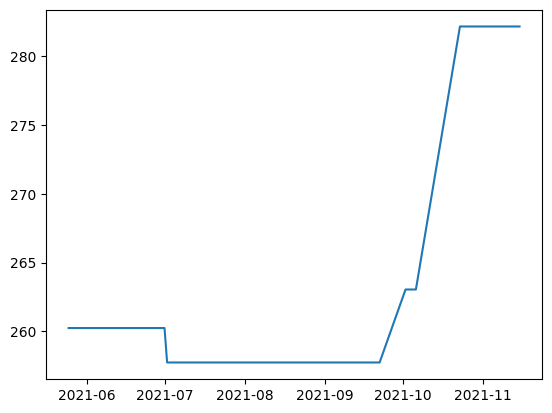

In [30]:
plt.plot(supp_data['date'], supp_data['price_year_eur'])
plt.show()

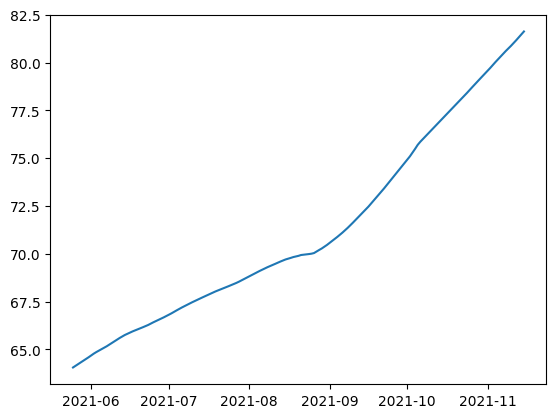

In [31]:
plt.plot(supp_data['date'], supp_data['peak_y06_SMA100'])
plt.show()

In [32]:
#df1 = supp_data.groupby('date').agg({'price_year_eur':'mean'})
#df1.join(X_test_pca).plot() 

In [33]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
predictions = model.predict(X_test_pca)

In [ ]:
mae = np.mean(abs(predictions - y_test))
print(f'Mean absolute error: {mae:.2f}')

In [ ]:
new_energy_market_prices = [[210, 150, 165, 200, 185], [240, 180, 195, 230, 220], [230, 170, 185, 220, 210]]
predicted_supplier_prices = model.predict(new_energy_market_prices)
print(f'Predicted supplier prices: {predicted_supplier_prices}')

In [ ]:
model.score(X_test_pca, y_test)